In [4]:
from sage.all import WeylGroup
import numpy as np
import matplotlib.pyplot as plt

def cayley_table_visualization(W, color_option='conjugacy', max_display_size=2000, dpi=300, savefile=None):
    """
      - W: A Coxeter group
      - color_option: Either 'conjugacy' or 'length'
      - max_display_size: If the group order is larger than this, the table is downsampled 
                          (selecting every kth element) for visualization purposes.
      - dpi: Resolution for saving the figure.
      - savefile: The image is saved to this file.
    """
    # Get a list of all group elements.
    elements = list(W)
    N = len(elements)
    
    # Downsample if the group is huge.
    if N > max_display_size:
        step = max(1, N // max_display_size)
        indices = list(range(0, N, step))
    else:
        indices = list(range(N))
    N_disp = len(indices)
    
    # color options
    if color_option == 'conjugacy':
        conj_classes = W.conjugacy_classes()
        prop_mapping = {}
        for idx, cl in enumerate(conj_classes):
            for g in cl:
                prop_mapping[g] = idx
        num_classes = len(conj_classes)
        title_str = "Conjugacy Class"
        
    elif color_option == 'length':
        prop_mapping = {g: g.length() for g in elements}
        max_length = max(prop_mapping.values())
        num_classes = max_length + 1  # lengths range from 0 to max_length
        title_str = "Coxeter Group Length"
        
    elif color_option == 'order':
        raw_mapping = {g: g.order() for g in elements}
        # Get the distinct orders and remap them to 0, 1, 2, ...
        orders = sorted(set(raw_mapping.values()))
        order_to_index = {o: i for i, o in enumerate(orders)}
        prop_mapping = {g: order_to_index[raw_mapping[g]] for g in elements}
        num_classes = len(orders)
        title_str = "Element Order"
        
    elif color_option == 'centralizer':
        # Map each element to the size of its centralizer.
        raw_mapping = {g: W.centralizer(g).cardinality() for g in elements}
        sizes = sorted(set(raw_mapping.values()))
        size_to_index = {s: i for i, s in enumerate(sizes)}
        prop_mapping = {g: size_to_index[raw_mapping[g]] for g in elements}
        num_classes = len(sizes)
        title_str = "Centralizer Size"
        
    elif color_option == 'reflection':
        # Map each element to its reflection length.
        prop_mapping = {g: g.reflection_length() for g in elements}
        max_reflection = max(prop_mapping.values())
        num_classes = max_reflection + 1
        title_str = "Reflection Length"

    elif color_option == 'KL degree':
        # Map each element to the degree of its Kazhdan-Lusztig polynomial P_{1,g}(q)
        prop_mapping = {}
        R.<q> = LaurentPolynomialRing(QQ)
        KL = KazhdanLusztigPolynomial(W,q)
        for g in elements:
            poly = KL.P(1, g)
            prop_mapping[g] = poly.degree()
        max_degree = max(prop_mapping.values())
        num_classes = max_degree + 1
        title_str = "Kazhdan-Lusztig Polynomial Degree"

    elif color_option == 'KL value':
        # Map each element to the value of its Kazhdan-Lusztig polynomial P_{1,g} at q=1
        prop_mapping = {}
        R.<q> = LaurentPolynomialRing(QQ)
        KL = KazhdanLusztigPolynomial(W,q)
        for g in elements:
            poly = KL.P(1, g)
            prop_mapping[g] = poly(1)
        max_degree = max(prop_mapping.values())
        num_classes = max_degree + 1
        title_str = "Kazhdan-Lusztig Polynomial Degree"
        
    else:
        raise ValueError("Unknown color_option: choose from 'conjugacy', 'length', 'order', 'centralizer', 'reflection', 'KL degree', 'KL value'")
    
    # Create the Cayley table
    M = np.zeros((N_disp, N_disp), dtype=int)
    for ii, i in enumerate(indices):
        g1 = elements[i]
        for jj, j in enumerate(indices):
            g2 = elements[j]
            prod = g1 * g2
            M[ii, jj] = prop_mapping[prod]
    group_label = "W({})".format(W.cartan_type())
    
    # Plot the table
    plt.figure(figsize=(10,10))
    cmap = plt.get_cmap('tab20', num_classes)  # change color scheme here. 
    im = plt.imshow(M, interpolation='none', cmap=cmap)
    cbar = plt.colorbar(im, ticks=range(num_classes))
    cbar.set_label(title_str)
    plt.title("Cayley Table of {} Colored by {}".format(group_label, title_str))
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    
    if savefile:
        plt.savefig(savefile, dpi=dpi, bbox_inches='tight')
    plt.show()



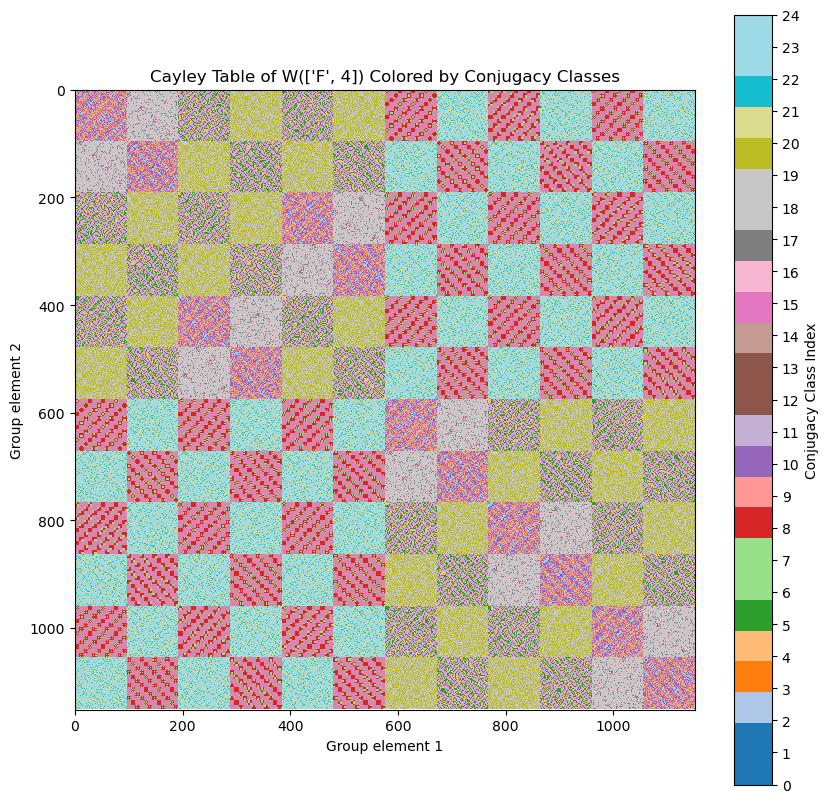

In [18]:
W = WeylGroup("F4", prefix="s")
cayley_table_visualization(W, color_option='conjugacy', max_display_size=1152)
# best looking one has color scheme 'tab20', but has repeats since number of classes 20 < 24 

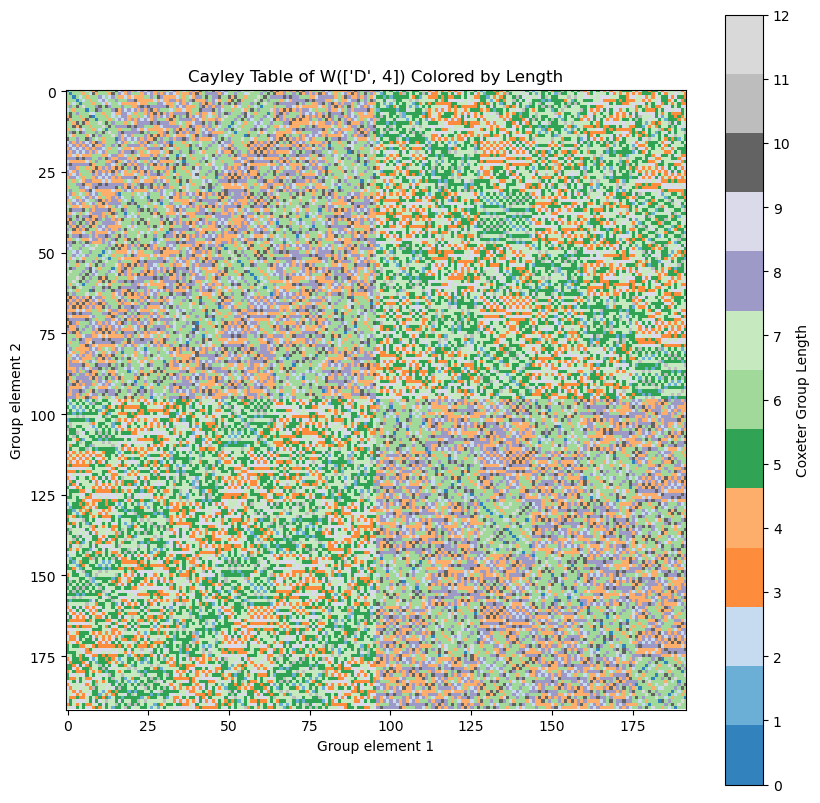

In [19]:
W = WeylGroup("D4", prefix="s")
cayley_table_visualization(W, color_option='length')

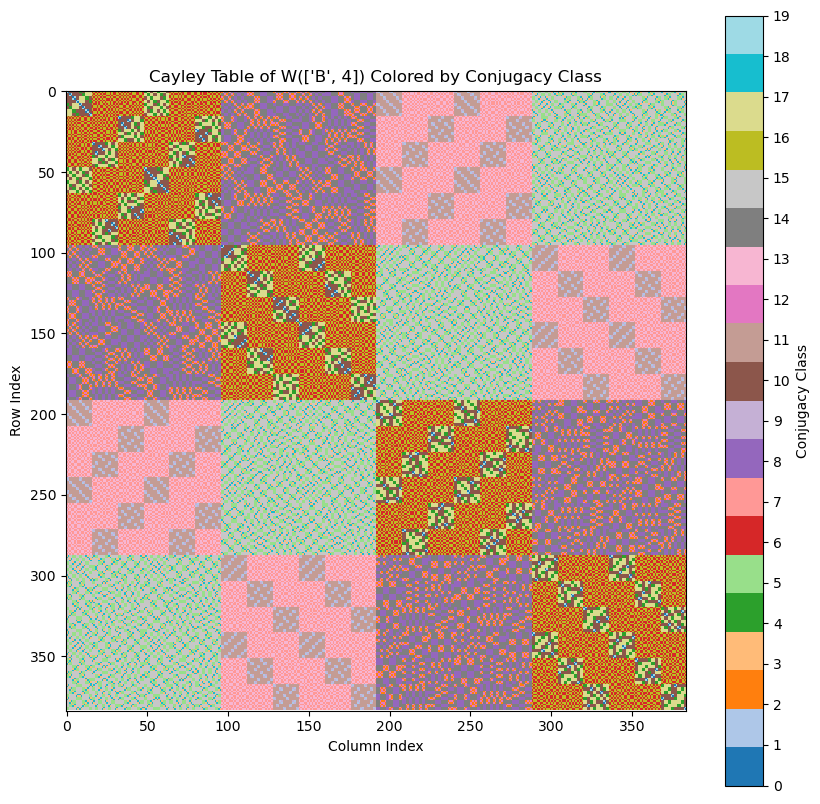

In [25]:
W = WeylGroup("B4", prefix="s")
cayley_table_visualization(W, color_option='conjugacy', max_display_size=3000)

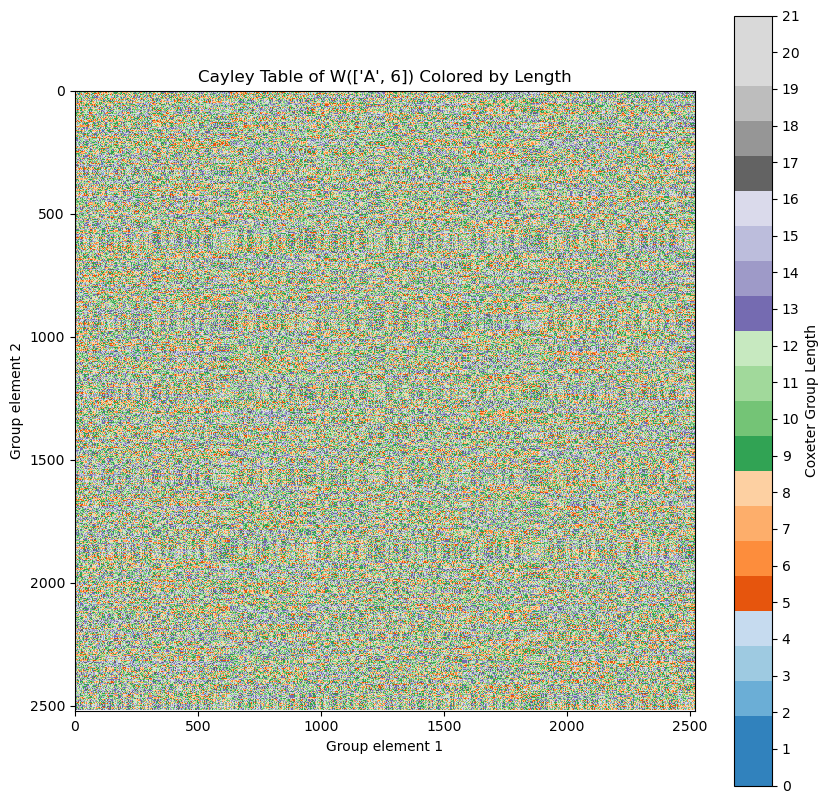

In [22]:
W = WeylGroup("A6", prefix="s")
cayley_table_visualization(W, color_option='length')

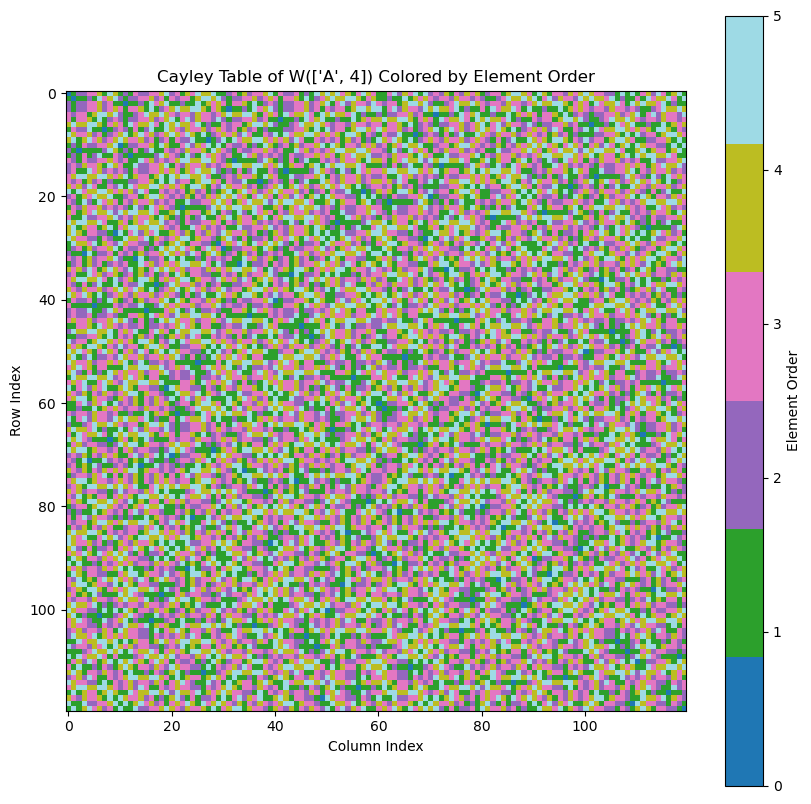

In [26]:
W = WeylGroup("A4", prefix="s")
cayley_table_visualization(W, color_option='order')

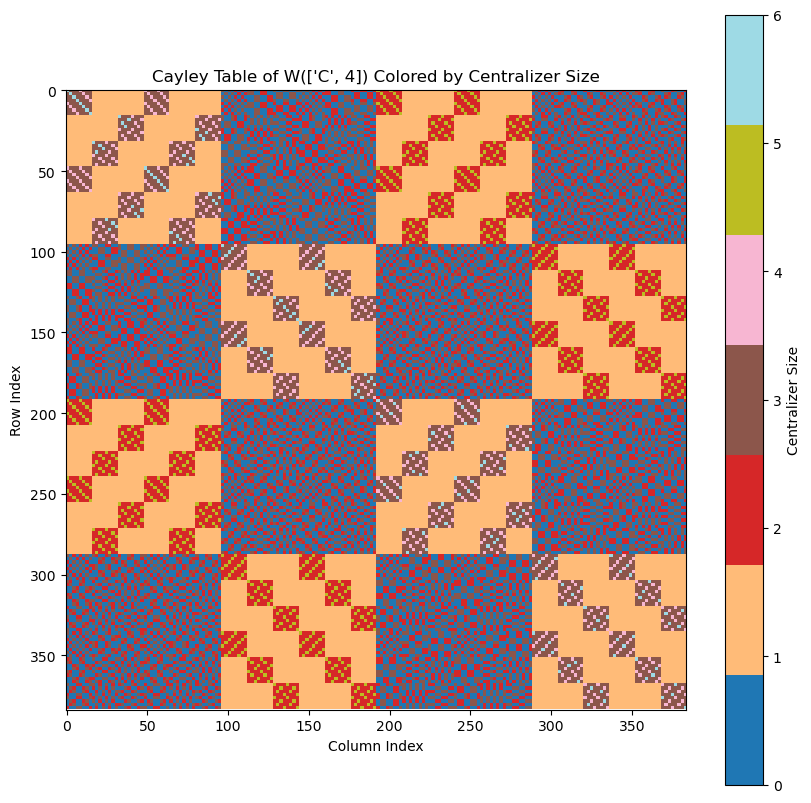

In [39]:
W = WeylGroup("C4", prefix="s")
cayley_table_visualization(W, color_option='centralizer')

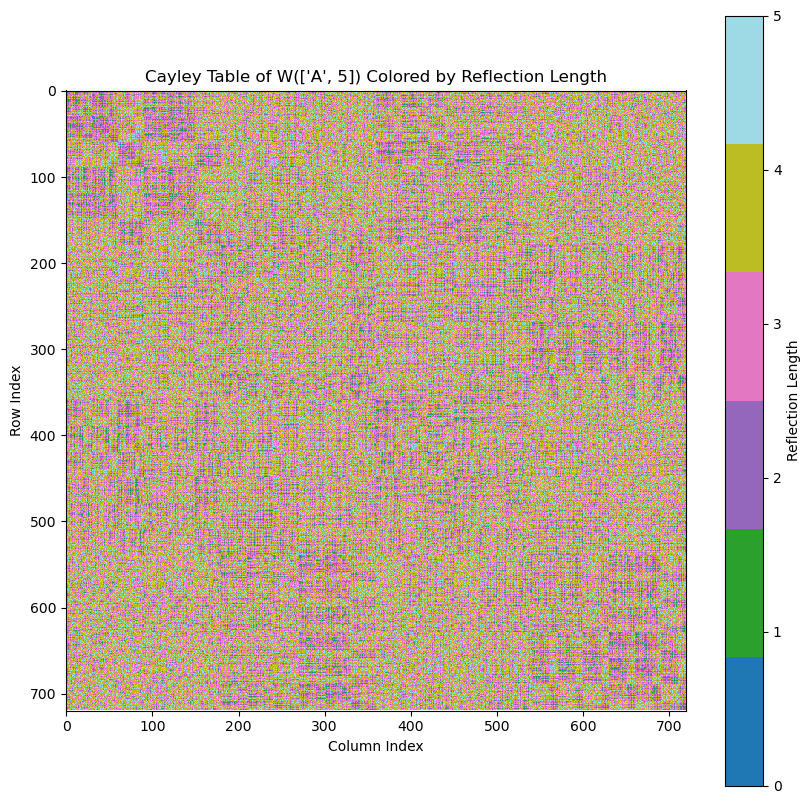

In [33]:
W = WeylGroup("A5", prefix="s")
cayley_table_visualization(W, color_option='reflection')

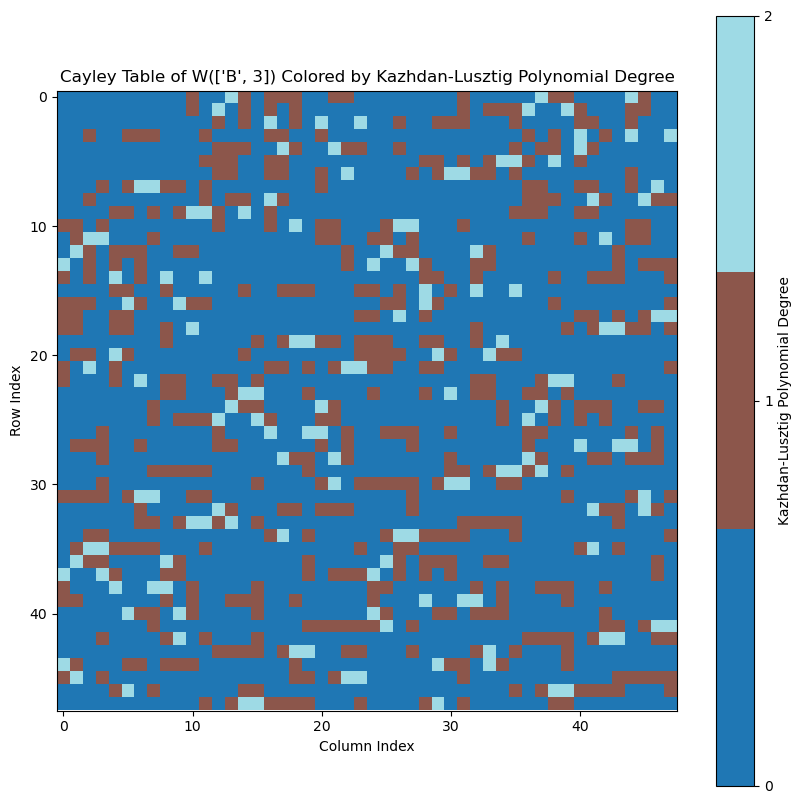

In [5]:
W = WeylGroup("B3", prefix="s")
cayley_table_visualization(W, color_option='KL degree')

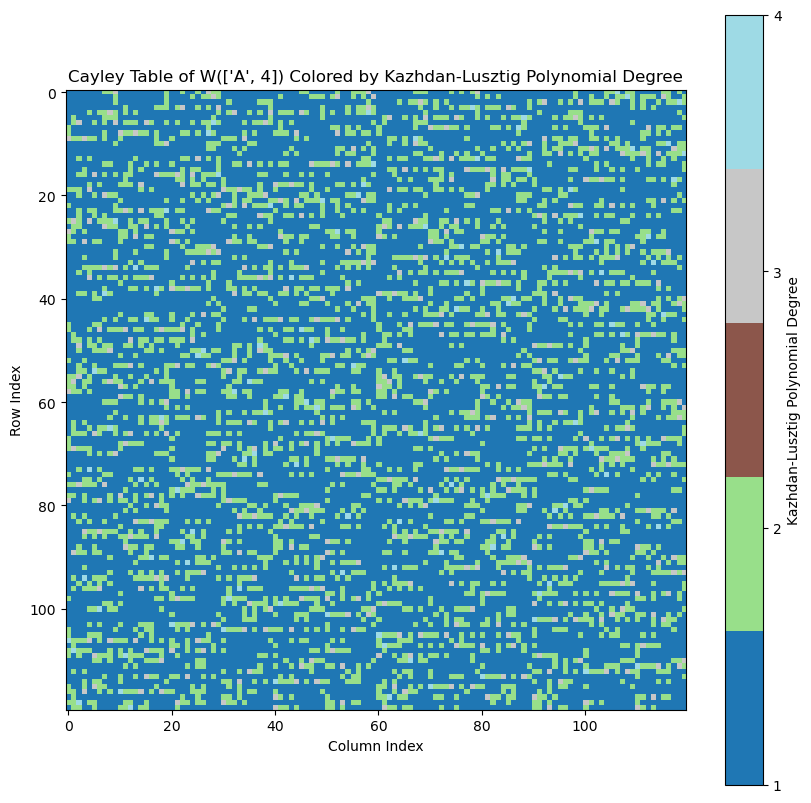

In [8]:
W = WeylGroup("A4", prefix="s")
cayley_table_visualization(W, color_option='KL value')